In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

C:\Users\91739\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#creating the SLR for the data set "Delivery Time"
df = pd.read_csv(r"C:\Users\91739\Downloads\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


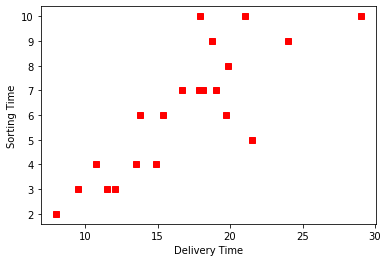

In [6]:
plt.plot(df['Delivery Time'], df['Sorting Time'],"rs")
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

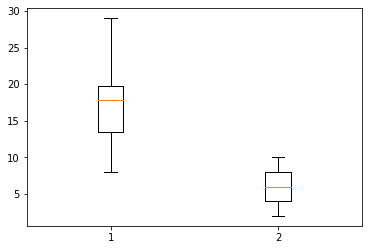

In [7]:
#checking for outliers
plt.boxplot(df)
plt.show()

In [8]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


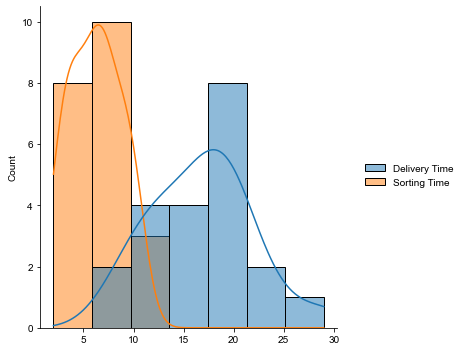

In [9]:
sns.displot(df, kde=True)
sns.set_style('darkgrid')
plt.show()

sns.regplot(x=df['Delivery Time'], y=df['Sorting Time']) 

In [10]:
# Renaming Columns
df = df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
#Model Building
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time", data=df).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        12:41:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Coefficients
model.params 

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj) 

(0.6822714748417231, 0.6655489208860244)

In [16]:
#Model Predictions
#1) Delivery_time -> Predict delivery time using sorting time 

In [17]:
#Manual prediction for sorting time of "5"
Delivery_time = 1.649020*(5) + 6.582734
Delivery_time

14.827834

In [18]:
#Automatic prediction using the above sorting time of "5"
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [19]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [20]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [21]:
sqrt = df.transform(np.sqrt) #applied sqrt transformation data
sqrt

,delivery_time,sorting_time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


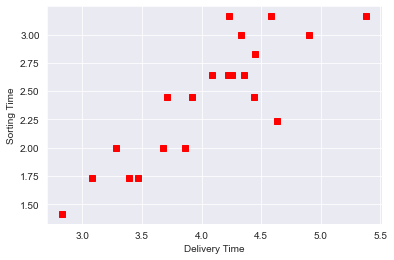

In [22]:
plt.plot(sqrt['delivery_time'], sqrt['sorting_time'],"rs")
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

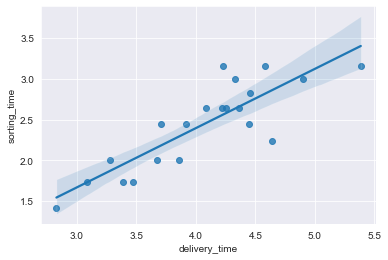

In [23]:
sns.regplot(x=sqrt['delivery_time'], y=sqrt['sorting_time'])
plt.show()

In [24]:
model_sqrt = smf.ols('delivery_time~sorting_time', data=sqrt).fit()

In [25]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           8.48e-07
Time:                        12:42:00   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6135      0.349      4.628      0.000       0.884       2.343
sorting_time     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
log_df = df.transform(np.log) #applying logarithmic transformation
log_df.head()

,delivery_time,sorting_time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


In [27]:
model_log = smf.ols('delivery_time~sorting_time', data=log_df).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.60e-07
Time:                        12:42:00   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7420      0.133     13.086      0.000       1.463       2.021
sorting_time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

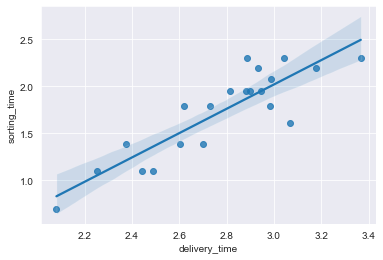

In [28]:
sns.regplot(x= log_df['delivery_time'], y=log_df['sorting_time'])
plt.show()

In [29]:
exp_df = df.transform(np.exp)
exp_df

,delivery_time,sorting_time
0,1.318816e+09,22026.465795
1,7.294164e+05,54.598150
2,3.778470e+08,403.428793
3,2.648912e+10,8103.083928
4,3.931334e+12,22026.465795
5,4.638956e+06,403.428793
6,1.784823e+08,1096.633158
7,1.335973e+04,20.085537
8,5.941160e+07,22026.465795
9,1.390022e+08,8103.083928


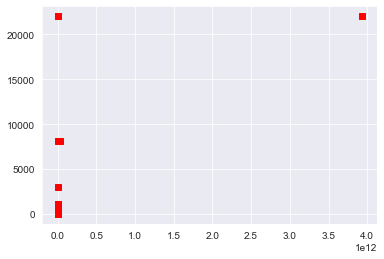

In [30]:
plt.plot(exp_df['delivery_time'], exp_df['sorting_time'], "rs")
plt.show()

In [31]:
model_exp = smf.ols('delivery_time~sorting_time', data=exp_df).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     7.156
Date:                Wed, 26 Jul 2023   Prob (F-statistic):             0.0150
Time:                        12:42:00   Log-Likelihood:                -602.95
No. Observations:                  21   AIC:                             1210.
Df Residuals:                      19   BIC:                             1212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.244e+10   1.89e+11     -0.331      0.744   -4.57e+11    3.32e+11
sorting_time   5.78e+07   2.16e+07      2.675      0.015    1.26e+07    1.03e+08
==============================================================================
Omnibus:                       29.198   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.647
Skew:                           2.162   Prob(JB):                     4.56e-16
Kurtosis:                      10.877   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#CONCLUSION : R-SQUARED VALUES FOR THE MODELS ARE BEST AT LOGARTHMIC TRANSFORMATION (R-SQUARED = 0.772). HENCE IT IS A BEST MODEL

In [33]:
#cube root trnasformation

cbrt_df = df.transform(np.cbrt)
cbrt_df.head()

,delivery_time,sorting_time
0,2.758924,2.154435
1,2.381102,1.587401
2,2.703060,1.817121
3,2.884499,2.080084
4,3.072317,2.154435


In [34]:
model_cbrt = smf.ols('delivery_time~sorting_time', data=cbrt_df).fit()
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           4.90e-07
Time:                        12:45:49   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0136      0.207      4.900      0.000       0.581       1.447
sorting_time     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

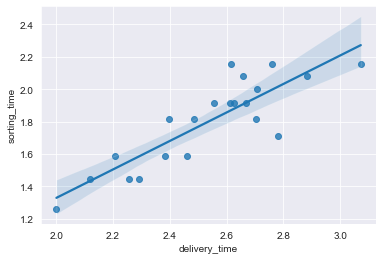

In [35]:
sns.regplot(x= cbrt_df['delivery_time'], y=cbrt_df['sorting_time'])
plt.show()

Insights

Among all transformations, R-squared values for the models are best at logarthmic transformation (r-squared = 0.772). hence it is a best model.
In this model, data is Right skewed and kurtosis is less than 3, hence it is having wider peak.